## Collect Data

In [216]:
import pandas as pd
"""
df = pd.read_csv('cfpb_complaints.csv')
df.head()
"""

"\ndf = pd.read_csv('cfpb_complaints.csv')\ndf.head()\n"

In [217]:
"""
# Group by Product
df.groupby(['Product']).size()
"""

"\n# Group by Product\ndf.groupby(['Product']).size()\n"

In [218]:
"""
# Filter only required data
df1 = df[(df.Product == 'Money transfers')][['Complaint ID', 'Consumer complaint narrative']].dropna().drop_duplicates()

# Rename Dataframe Columns
df1.columns = ['text_id', 'text_string']

# Backup for future use
df1.to_csv('cfpb_complaints_mt.csv', index=False) # df index not required
"""

"\n# Filter only required data\ndf1 = df[(df.Product == 'Money transfers')][['Complaint ID', 'Consumer complaint narrative']].dropna().drop_duplicates()\n\n# Rename Dataframe Columns\ndf1.columns = ['text_id', 'text_string']\n\n# Backup for future use\ndf1.to_csv('cfpb_complaints_mt.csv', index=False) # df index not required\n"

In [219]:
df_data = pd.read_csv('cfpb_complaints_mt.csv')
df_data.head()

,doc_id,doc_text
0,2444630,"While receiving payments via Venmo and Paypal,..."
1,2447693,I was contacted by someone on XXXX XXXX sa...
2,2446473,I had a XXXX account where I bought and so...
3,2445547,When I initiate a payment within Venmo for an ...
4,2444481,At or around XXXX I visited Pay-O-Matic to s...


## Clean Data

- Make text lowercase.
- Remove text in square brackets.
- Remove punctuation.
- Remove words containing numbers.
- Remove additional punctuations.

In [220]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    # Make text lowercase
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    
    # Remove additional punctuations
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)    
    
    # Replace/remove the character "xxxx" (these are used to mask PII information)
    text = re.sub('xxxx', '', text)
    text = re.sub('xxx', '', text)
        
    return text

clean_apply = lambda x: clean_text(x)

# Let's take a look at the updated text
df_clean = data_df
df_clean['doc_text'] = data_df.doc_text.apply(clean_apply)
df_clean.head()

## Organize Data

### Corpus

We already created a corpus in an earlier step. The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [222]:
df_clean.head()

,doc_id,doc_text
0,2444630,while receiving payments via venmo and paypal ...
1,2447693,i was contacted by someone on saying the...
2,2446473,i had a account where i bought and sold i...
3,2445547,when i initiate a payment within venmo for an ...
4,2444481,at or around i visited payomatic to send mo...


### Document-Term Matrix

In [223]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
csr_cv = cv.fit_transform(df_clean.doc_text)
df_dtm = pd.DataFrame(csr_cv.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_clean.doc_id
df_dtm.head()

,ab,aback,abide,abiding,abilities,ability,abjectly,able,abount,aboutwhat,...,youraccountour,youwill,yr,yrs,yur,yyyy,zero,zip,zone,zoom
doc_id,,,,,,,,,,,,,,,,,,,,,
2444630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis (EDA)

**EDA Steps**
1. **Data** - Determine the format (Corpus/Document Term Matrix) of raw data we need to start.
2. **Aggregate** - Figure out how to aggregate the data.
3. **Visualize** - Find the best way to visualize the data (e.g wordcloud)
4. **Insights** - Extract some key takeaways from the visualization.

**Follow the EDA Steps for following :**
1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms


In [224]:
df_dtm_transpose = df_dtm.transpose()
df_dtm_transpose.head()

doc_id,2444630,2447693,2446473,2445547,2444481,2444452,2442553,2442824,2443162,2440637,...,1301385,1301028,1298786,1296139,1296674,1294891,1294659,1292962,1291586,1291028
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abilities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1) Most common words

In [225]:
# Find the top 10 words said by each Complaint Text
top_dict = {}
for c in df_dtm_transpose.columns:
    top = data[c].sort_values(ascending=False).head(10)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{2444630: [('money', 2),
  ('does', 1),
  ('cases', 1),
  ('rests', 1),
  ('stay', 1),
  ('receiving', 1),
  ('manually', 1),
  ('log', 1),
  ('request', 1),
  ('account', 1)],
 2447693: [('receive', 5),
  ('money', 5),
  ('cash', 4),
  ('said', 3),
  ('pay', 2),
  ('send', 2),
  ('agent', 2),
  ('hold', 2),
  ('legal', 2),
  ('legit', 2)],
 2446473: [('paypal', 3),
  ('account', 3),
  ('items', 2),
  ('bought', 2),
  ('closed', 2),
  ('funds', 1),
  ('refunds', 1),
  ('paid', 1),
  ('issuing', 1),
  ('money', 1)],
 2445547: [('balance', 2),
  ('account', 2),
  ('venmo', 2),
  ('app', 2),
  ('debits', 1),
  ('initiate', 1),
  ('leaves', 1),
  ('intact', 1),
  ('company', 1),
  ('cause', 1)],
 2444481: [('daughter', 6),
  ('line', 4),
  ('money', 4),
  ('customer', 3),
  ('error', 3),
  ('business', 3),
  ('receive', 3),
  ('transaction', 3),
  ('funds', 2),
  ('helped', 2)],
 2444452: [('apartment', 4),
  ('wire', 3),
  ('told', 3),
  ('bank', 3),
  ('transfer', 3),
  ('nt', 2),
  ('se

In [226]:
# Print the top 10 words in each Complaint Text
for doc_id, top_words in top_dict.items():
    print(doc_id)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('---')

2444630
money, does, cases, rests, stay, receiving, manually, log, request, account
---
2447693
receive, money, cash, said, pay, send, agent, hold, legal, legit
---
2446473
paypal, account, items, bought, closed, funds, refunds, paid, issuing, money
---
2445547
balance, account, venmo, app, debits, initiate, leaves, intact, company, cause
---
2444481
daughter, line, money, customer, error, business, receive, transaction, funds, helped
---
2444452
apartment, wire, told, bank, transfer, nt, secure, confirmation, email, owner
---
2442553
received, wells, fargo, fees, missing, transaction, sent, bank, central, structured
---
2442824
account, email, paypal, using, fraudulent, named, said, verified, internationally, emails
---
2443162
online, deposited, status, account, customer, recipient, delivery, request, receipt, receipts
---
2440637
paypal, high, risk, account, days, told, funds, filed, friends, family
---
2440626
paypal, account, phone, limitation, receive, bank, login, used, unable, 

2090458
receivers, money, transaction, union, photo, id, western, send, information, date
---
2090437
told, account, customer, different, skrill, try, refund, representatives, close, send
---
2088514
paypal, fraud, account, camp, set, did, provide, owners, surf, complaint
---
2086676
website, gram, claimed, puppy, transfer, delivered, requested, selling, money, favorable
---
2084847
transfer, record, money, website, completed, today, recipient, tracking, states, notified
---
2084720
closed, account, service, pall, confirmed, did, rude, nt, release, reason
---
2084602
google, money, stop, messages, like, getting, annoying, refund, know, irs
---
2084018
paypal, account, credit, accept, canceled, taken, email, pay, directly, fax
---
2084187
union, said, western, sr, did, fax, copy, attoney, just, nt
---
2082309
security, chase, service, financial, customers, bank, unknown, party, information, submit
---
2083074
money, account, checking, xoom, transfer, person, savings, day, saving, transa

1710505
money, paid, went, said, told, sent, minutescould, manager, takes, threw
---
1710378
action, company, money, individuals, individual, resolution, families, contributions, lately, agency
---
1709798
fraud, office, involved, spelling, instead, complain, claimed, error, correct, gave
---
1708000
money, receiver, western, union, received, states, sent, faxed, fb, faxing
---
1708786
moneygram, saying, irssent, walmart, scammed, zoom, faxed, fb, faxing, faxes
---
1708388
pay, western, union, money, agents, time, going, need, accept, limit
---
1708771
pay, credit, pal, card, line, ebay, mail, defaulted, actually, default
---
1708824
wallet, google, called, account, hours, bank, card, refund, checking, took
---
1707686
puppy, western, union, area, money, sent, did, day, thought, scam
---
1708066
money, moneygram, send, latinos, penalty, discriminatory, online, shut, company, customer
---
1707955
pay, western, union, speed, line, provide, realized, digit, like, mortgage
---
1707327
avai

1339331
time, called, money, process, told, account, close, bought, different, fees
---
1337331
received, properly, money, shipping, heard, goods, initially, disagreeable, item, original
---
1337867
actually, money, day, business, moneygram, called, company, refund, doesnt, reason
---
1336268
buyer, paypal, funds, item, favor, case, did, id, provide, chance
---
1336190
money, recipient, available, union, confirmed, email, confirmation, told, send, received
---
1336209
seller, paypal, make, payment, thinking, butthey, butthe, soplease, using, fraudulent
---
1333450
website, sent, money, wire, vacation, rental, person, referenced, bank, address
---
1333873
nt, did, kiosk, security, question, phone, money, told, said, took
---
1330782
account, paypal, did, transfer, balance, savings, checking, nt, day, taken
---
1327048
citizens, transfer, bank, sent, international, money, paid, deliver, fees, agreed
---
1327672
tickets, email, accepted, sent, money, concert, gave, text, answering, texted

In [227]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for doc_id in df_dtm_transpose.columns:
    top = [word for (word, count) in top_dict[doc_id]]
    for t in top:
        words.append(t)
        
words

['money',
 'does',
 'cases',
 'rests',
 'stay',
 'receiving',
 'manually',
 'log',
 'request',
 'account',
 'receive',
 'money',
 'cash',
 'said',
 'pay',
 'send',
 'agent',
 'hold',
 'legal',
 'legit',
 'paypal',
 'account',
 'items',
 'bought',
 'closed',
 'funds',
 'refunds',
 'paid',
 'issuing',
 'money',
 'balance',
 'account',
 'venmo',
 'app',
 'debits',
 'initiate',
 'leaves',
 'intact',
 'company',
 'cause',
 'daughter',
 'line',
 'money',
 'customer',
 'error',
 'business',
 'receive',
 'transaction',
 'funds',
 'helped',
 'apartment',
 'wire',
 'told',
 'bank',
 'transfer',
 'nt',
 'secure',
 'confirmation',
 'email',
 'owner',
 'received',
 'wells',
 'fargo',
 'fees',
 'missing',
 'transaction',
 'sent',
 'bank',
 'central',
 'structured',
 'account',
 'email',
 'paypal',
 'using',
 'fraudulent',
 'named',
 'said',
 'verified',
 'internationally',
 'emails',
 'online',
 'deposited',
 'status',
 'account',
 'customer',
 'recipient',
 'delivery',
 'request',
 'receipt',
 'rec

In [228]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('money', 754),
 ('account', 535),
 ('bank', 330),
 ('paypal', 328),
 ('transfer', 274),
 ('sent', 217),
 ('funds', 211),
 ('told', 209),
 ('did', 195),
 ('union', 192),
 ('transaction', 182),
 ('western', 169),
 ('nt', 156),
 ('received', 154),
 ('said', 138),
 ('number', 138),
 ('send', 130),
 ('called', 124),
 ('email', 112),
 ('payment', 112),
 ('refund', 109),
 ('wire', 108),
 ('credit', 101),
 ('moneygram', 101),
 ('card', 89),
 ('information', 87),
 ('phone', 85),
 ('time', 84),
 ('days', 81),
 ('asked', 78),
 ('pay', 76),
 ('company', 74),
 ('service', 67),
 ('hold', 59),
 ('help', 58),
 ('ebay', 56),
 ('business', 55),
 ('person', 55),
 ('online', 54),
 ('customer', 53),
 ('check', 53),
 ('contacted', 52),
 ('gram', 51),
 ('seller', 50),
 ('fee', 49),
 ('contact', 49),
 ('receive', 47),
 ('paid', 46),
 ('fraud', 44),
 ('checking', 42),
 ('fargo', 41),
 ('recipient', 41),
 ('wu', 41),
 ('request', 40),
 ('wells', 40),
 ('used', 39),
 ('item', 39),
 ('need', 39),
 ('agent', 38)

In [229]:
# If more than half of the documents have it as a top word, exclude it from the list
count_half = df_clean['doc_id'].count()/2
add_stop_words = [word for word, count in Counter(words).most_common() if count > count_half]
add_stop_words

['money']

In [230]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
#data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
csr_cv = cv.fit_transform(df_clean.doc_text)
df_stop = pd.DataFrame(csr_cv.toarray(), columns=cv.get_feature_names())
df_stop.index = df_clean.index

# Pickle it for later use
#import pickle
#pickle.dump(cv, open("cv_stop.pkl", "wb"))
#data_stop.to_pickle("dtm_stop.pkl")

In [231]:
df_clean = df_clean.head(20)
df_clean

,doc_id,doc_text
0,2444630,while receiving payments via venmo and paypal ...
1,2447693,i was contacted by someone on saying the...
2,2446473,i had a account where i bought and sold i...
3,2445547,when i initiate a payment within venmo for an ...
4,2444481,at or around i visited payomatic to send mo...
5,2444452,i was using for the first time to secure an...
6,2442553,i have received a payment of from s c...
7,2442824,someone is trying to set up their paypal accou...
8,2443162,hi an online transfer request of was made ...
9,2440637,i was notified b y paypal o n that ...


### 2) Word Clouds

In [232]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

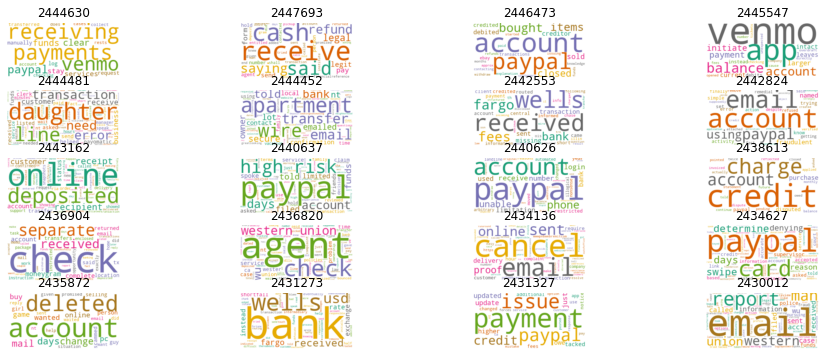

In [238]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

for idx in df_clean.index: 
    
    doc_id = df_clean['doc_id'][idx]
    doc_text = df_clean['doc_text'][idx]
    
    #print(doc_id,doc_text)
    
    wc.generate(doc_text)
    
    plt.subplot(5, 4, idx+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(doc_id)

plt.show()


## Topic Modeling - Attempt #1 (All Text)

In [239]:
# Let's read in our document-term matrix
#import pandas as pd
#import pickle

#data = pd.read_csv('cfpb_complaints_mt.csv')
df_dtm.head()
df_dtm_transpose.head()

doc_id,2444630,2447693,2446473,2445547,2444481,2444452,2442553,2442824,2443162,2440637,...,1301385,1301028,1298786,1296139,1296674,1294891,1294659,1292962,1291586,1291028
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abilities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [241]:
# One of the required inputs is a term-document matrix
#tdm = data.transpose()
#tdm.head()

In [242]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(df_dtm_transpose)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [252]:
sparse_counts

<8293x1497 sparse matrix of type '<class 'numpy.int64'>'
	with 83338 stored elements in Compressed Sparse Row format>

In [243]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
#cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [245]:
id2word

{5848: 'receiving',
 5180: 'payments',
 7912: 'venmo',
 5189: 'paypal',
 1230: 'clear',
 3046: 'funds',
 6944: 'stay',
 6607: 'services',
 4364: 'manually',
 4237: 'log',
 6154: 'request',
 7507: 'transferred',
 1164: 'checking',
 57: 'account',
 1054: 'cases',
 6249: 'rests',
 2213: 'does',
 1291: 'collect',
 1521: 'contacted',
 6455: 'saying',
 4346: 'manager',
 5838: 'receive',
 1055: 'cash',
 5958: 'refund',
 2475: 'entitled',
 4110: 'legal',
 4116: 'legit',
 6420: 'said',
 6632: 'shall',
 5170: 'pay',
 2937: 'form',
 6573: 'send',
 218: 'agent',
 5257: 'person',
 5939: 'reference',
 4842: 'number',
 3167: 'gram',
 6589: 'sent',
 5305: 'pickup',
 4019: 'knew',
 6465: 'scammed',
 7484: 'transaction',
 6289: 'returned',
 2420: 'end',
 2027: 'did',
 5601: 'promised',
 7563: 'tried',
 3120: 'given',
 4341: 'man',
 981: 'called',
 3389: 'hold',
 2833: 'financial',
 3765: 'institute',
 126: 'added',
 1947: 'deposit',
 5840: 'received',
 985: 'calls',
 1795: 'days',
 483: 'asking',
 7410:

In [248]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

IndexError: index 8292 is out of bounds for axis 1 with size 8292

In [ ]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

In [ ]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()